## EDA of the Customer Churn Dataset

### Importing the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/home/chimpanzee/coding/projects/customer-churn-prediction/dataset/customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.shape

(440833, 12)

In [4]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
df.loc[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()

In [8]:
df.loc[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [9]:
df.loc[df.duplicated()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


### Univariate Analysis

In [10]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

#### Age

<Axes: ylabel='Density'>

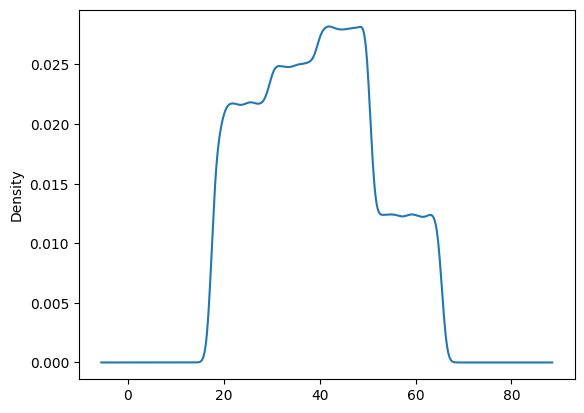

In [11]:
df['Age'].plot(kind='kde')

In [12]:
df['Age'].skew()

np.float64(0.16201568056624352)

In [13]:
df['Age'].describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

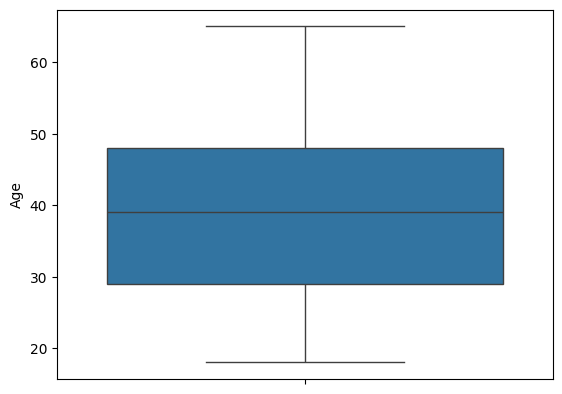

In [14]:
sns.boxplot(df['Age'])

#### Gender

In [15]:
df['Gender'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

<Axes: ylabel='count'>

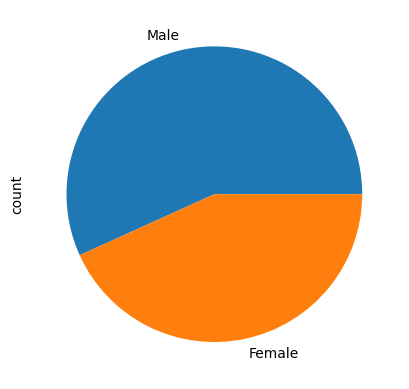

In [16]:
df['Gender'].value_counts().plot(kind='pie')

#### Tenure

In [17]:
df['Tenure'].describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

<Axes: ylabel='Density'>

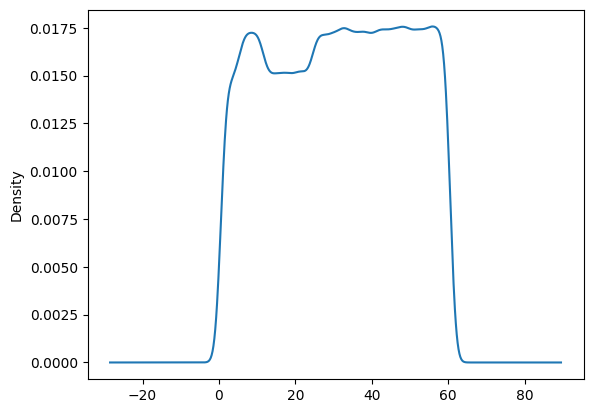

In [18]:
df['Tenure'].plot(kind='kde')

<Axes: xlabel='Tenure', ylabel='Count'>

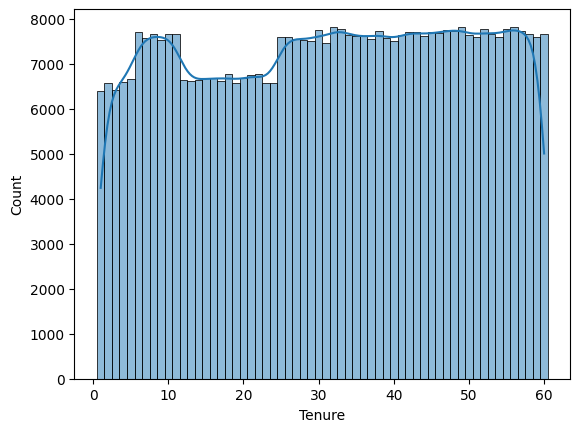

In [66]:
sns.histplot(df['Tenure'], kde=True, discrete=True)

<Axes: ylabel='Tenure'>

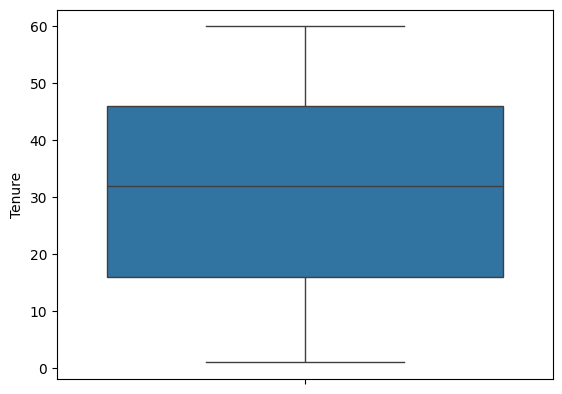

In [20]:
sns.boxplot(df['Tenure'])

#### Usage Frequency

In [21]:
df['Usage Frequency'].head()

0    14.0
1     1.0
2     4.0
3    21.0
4    20.0
Name: Usage Frequency, dtype: float64

In [22]:
df['Usage Frequency'].describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

<Axes: xlabel='Usage Frequency', ylabel='Count'>

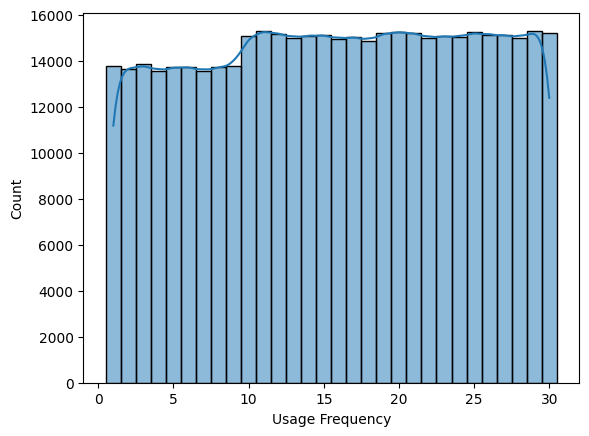

In [68]:
sns.histplot(df['Usage Frequency'], kde=True, discrete=True)

<Axes: >

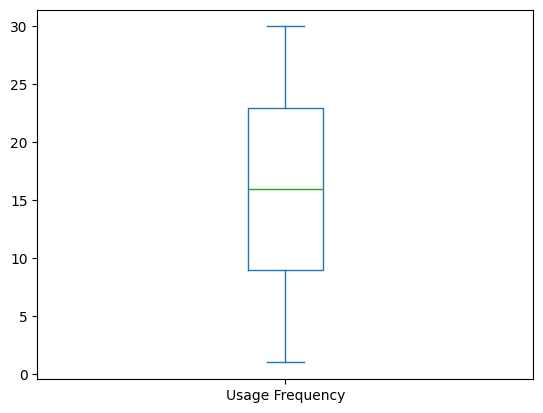

In [24]:
df['Usage Frequency'].plot(kind='box')

#### Support Calls

In [25]:
df['Support Calls'].value_counts()

Support Calls
0.0     69875
1.0     69476
2.0     66571
3.0     52729
4.0     38750
5.0     24918
10.0    23900
7.0     23870
9.0     23630
8.0     23559
6.0     23554
Name: count, dtype: int64

In [26]:
df['Support Calls'].describe()

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: Support Calls, dtype: float64

<Axes: ylabel='Frequency'>

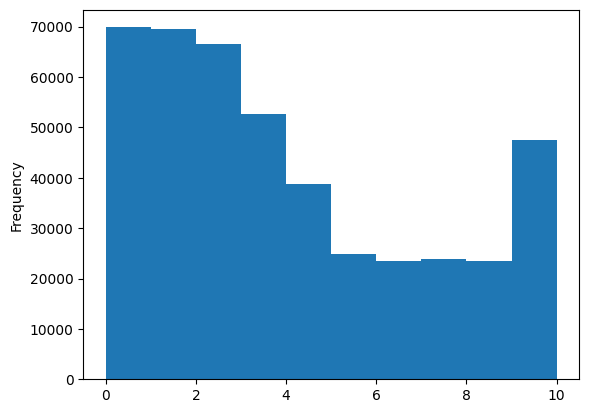

In [27]:
df['Support Calls'].plot(kind='hist')

<Axes: ylabel='Density'>

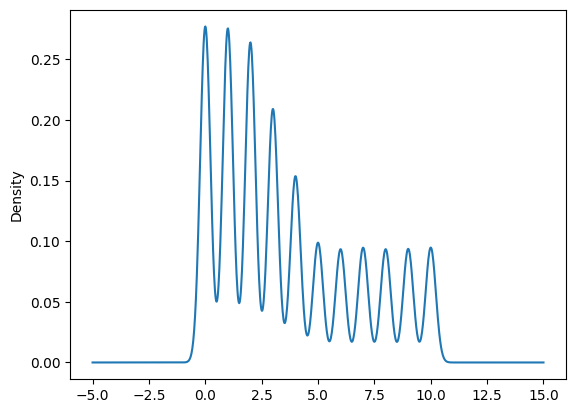

In [65]:
df['Support Calls'].plot(kind='kde')

In [28]:
df['Support Calls'].skew()

np.float64(0.6668085055364663)

<Axes: ylabel='Support Calls'>

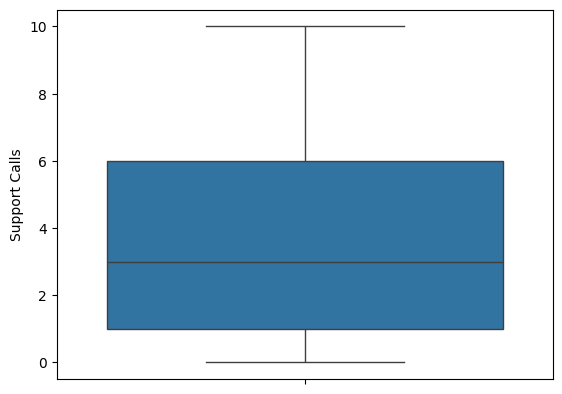

In [29]:
sns.boxplot(df['Support Calls'])

#### Payment Delay

In [30]:
df['Payment Delay'].head()

0    18.0
1     8.0
2    18.0
3     7.0
4     8.0
Name: Payment Delay, dtype: float64

In [31]:
df['Payment Delay'].describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: Payment Delay, dtype: float64

<Axes: ylabel='Frequency'>

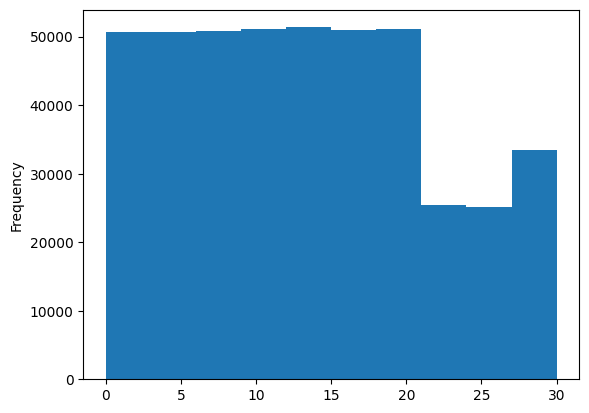

In [32]:
df['Payment Delay'].plot(kind='hist')

<Axes: ylabel='Density'>

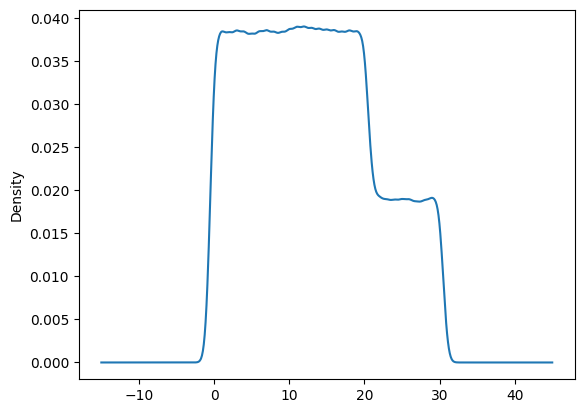

In [33]:
df['Payment Delay'].plot(kind='kde')

<Axes: ylabel='Payment Delay'>

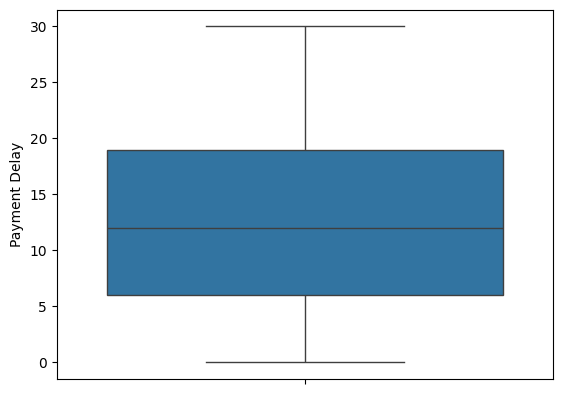

In [34]:
sns.boxplot(df['Payment Delay'])

#### Subscription Type

In [35]:
df['Subscription Type'].head()

0    Standard
1       Basic
2       Basic
3    Standard
4       Basic
Name: Subscription Type, dtype: object

In [36]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

<Axes: xlabel='Subscription Type'>

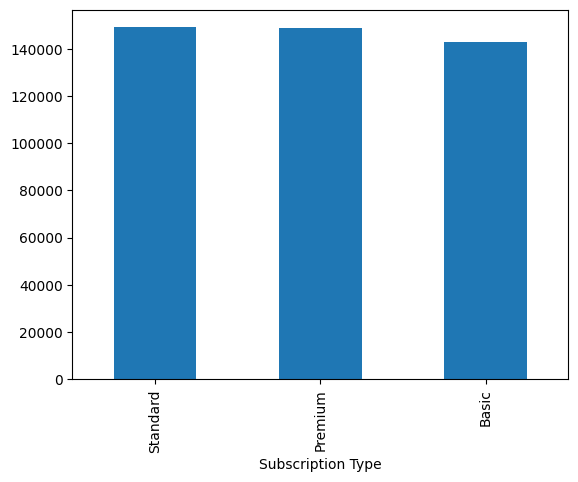

In [37]:
df['Subscription Type'].value_counts().plot(kind='bar')

#### Contract Length|

In [38]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

<Axes: xlabel='Contract Length'>

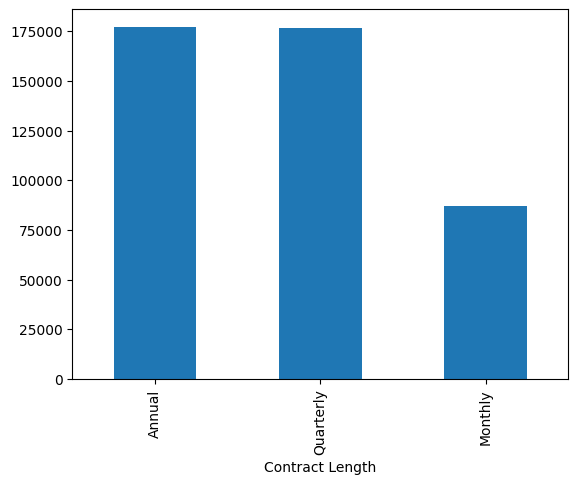

In [39]:
df['Contract Length'].value_counts().plot(kind='bar')

#### Total Spend

In [40]:
df['Total Spend'].head()

0    932.0
1    557.0
2    185.0
3    396.0
4    617.0
Name: Total Spend, dtype: float64

In [41]:
df['Total Spend'].describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64

<Axes: ylabel='Frequency'>

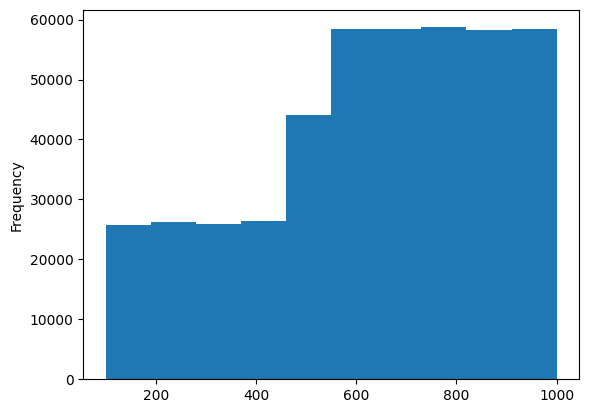

In [42]:
df['Total Spend'].plot(kind='hist')

<Axes: ylabel='Total Spend'>

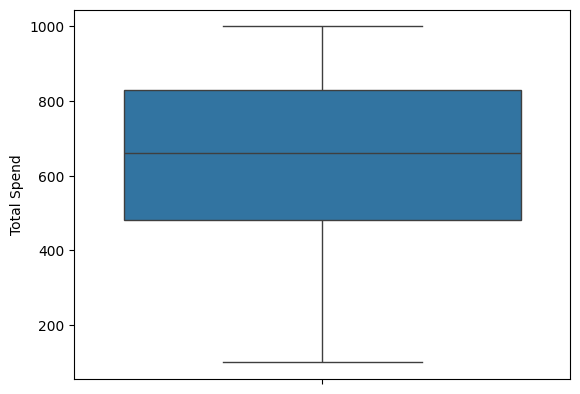

In [43]:
sns.boxplot(df['Total Spend'])

#### Last Interaction

In [44]:
df['Last Interaction'].head()

0    17.0
1     6.0
2     3.0
3    29.0
4    20.0
Name: Last Interaction, dtype: float64

In [45]:
df['Last Interaction'].describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: Last Interaction, dtype: float64

<Axes: ylabel='Frequency'>

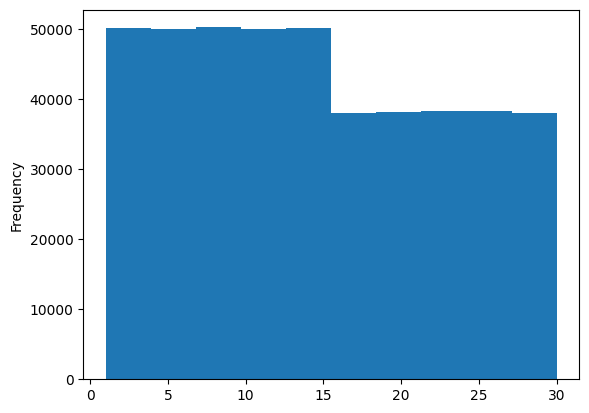

In [46]:
df['Last Interaction'].plot(kind='hist')

<Axes: ylabel='Last Interaction'>

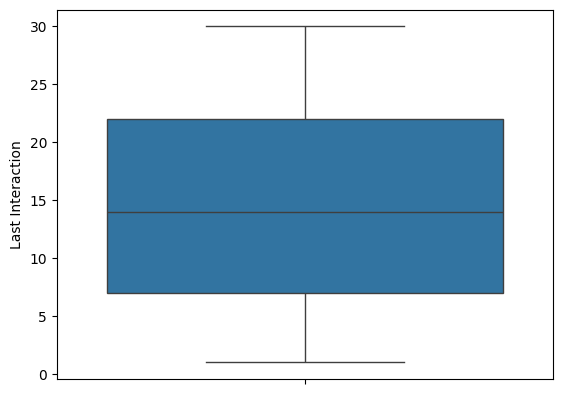

In [47]:
sns.boxplot(df['Last Interaction'])

#### Churn

In [48]:
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

<Axes: ylabel='count'>

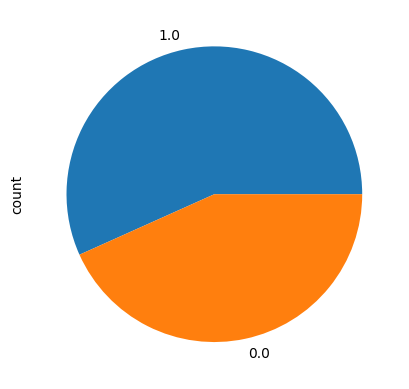

In [49]:
df['Churn'].value_counts().plot(kind='pie')

### Bivariate Analysis

In [50]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [51]:
def numerical_kde_plot(df, feature):
    df[df['Churn'] == 1][feature].plot(kind='kde',label='Churned')
    df[df['Churn'] == 0][feature].plot(kind='kde',label='Not Churned')
    plt.legend()
    plt.show()


In [77]:
def numerical_hist_plot(df, feature, max_bin=None):
    churned = df[df['Churn'] == 1][feature]
    not_churned = df[df['Churn'] == 0][feature]

    # Define bin range
    min_val = int(df[feature].min())
    max_val = int(df[feature].max()) if max_bin is None else int(max_bin)
    bins = range(min_val, max_val + 2)  # +2 so the max value is included

    plt.hist([churned[churned <= max_val], not_churned[not_churned <= max_val]], 
             bins=bins, 
             label=['Churned', 'Not Churned'], 
             align='left', 
             rwidth=0.8)

    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()


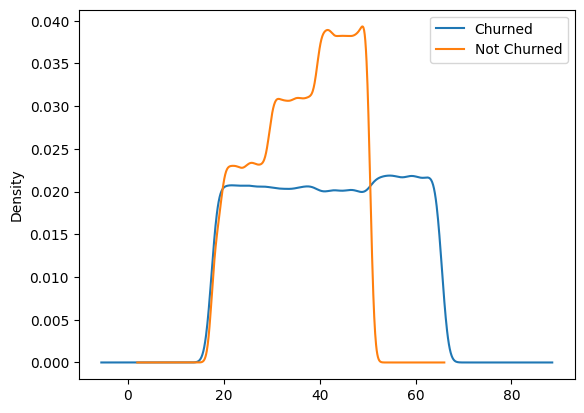

In [52]:
numerical_kde_plot(df,'Age')

<Axes: xlabel='Gender', ylabel='Churn'>

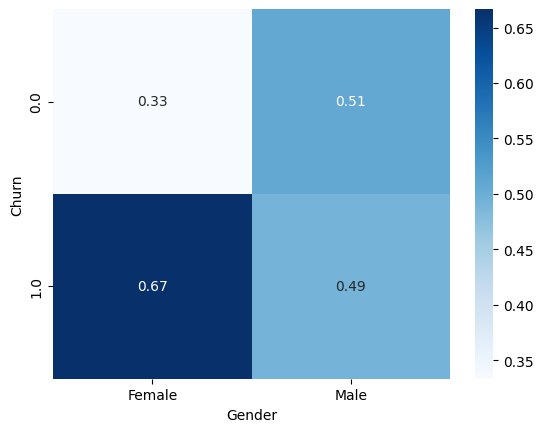

In [60]:
sns.heatmap(pd.crosstab(df['Churn'], df['Gender'], normalize='columns'), annot=True, cmap='Blues')

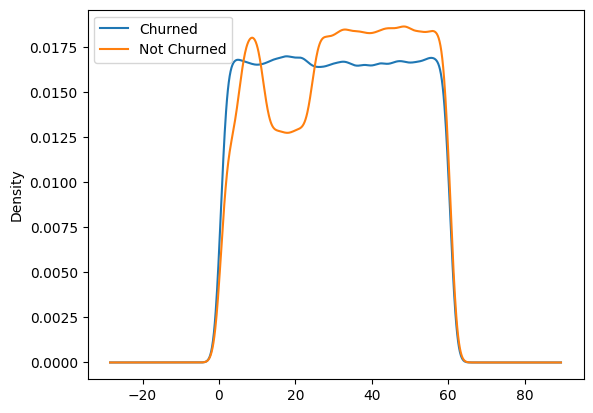

In [62]:
numerical_kde_plot(df, 'Tenure')

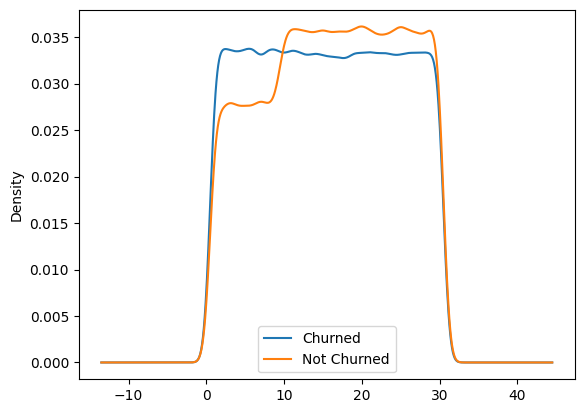

In [63]:
numerical_kde_plot(df, 'Usage Frequency')

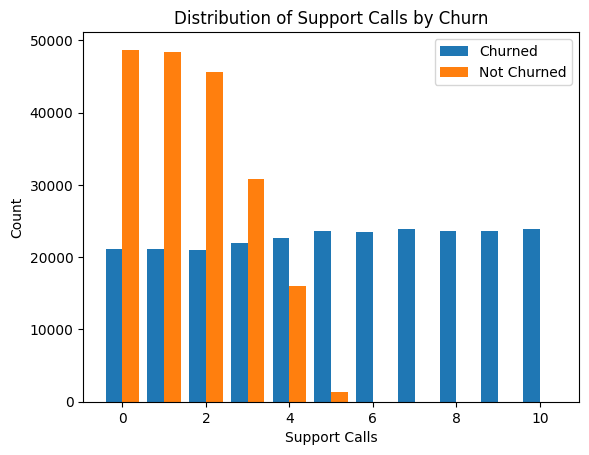

In [78]:
numerical_hist_plot(df, 'Support Calls')